<a href="https://colab.research.google.com/github/vishalgimhan/NLP-Projects/blob/main/YouTube_Trending_Video_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/YoutubeVideoData.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
# plotting configurations
PLOT_COLORS = ["#268bd2", "#0053CC", "#FF5722", "#b58900", "#0035fc"] # a list of colors
pd.options.display.float_format = '{:.2f}'.format # set display format to two decimal plcaes
sns.set(style="ticks")
plt.rc('figure', figsize=(8,5), dpi=100) #plot size
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14) #label appearance
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4) #grid appearance
plt.rc('font', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [10]:
# Data Exploration
df['description'] = df['description'].fillna(value="")

In [11]:
df.describe()

,category_id,views,likes,dislikes,comment_count,title_length
count,35349.00,35349.00,35349.00,35349.00,35349.00,35349.00
mean,20.10,1902529.32,61493.63,3097.44,7066.05,48.50
std,7.52,5839415.14,181625.60,29569.72,30680.32,19.65
min,1.00,549.00,0.00,0.00,0.00,4.00
25%,17.00,201980.00,4485.00,170.00,526.00,34.00
50%,24.00,561752.00,15163.00,531.00,1589.00,46.00
75%,25.00,1501028.00,45309.00,1602.00,4692.00,61.00
max,43.00,149376127.00,3749810.00,1674420.00,1361580.00,100.00


# Data Visualization

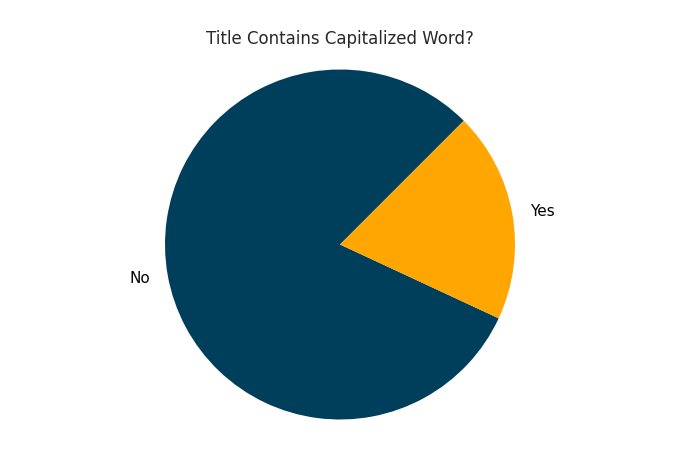

In [12]:
# Function to check FULLY CAPITALIZED WORDS
def contains_capitalized_word(s):
  for w in s.split():
    if w.isupper():
      return True
    return False

# take a count
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts().to_dict()

# pie chart
fig, ax = plt.subplots() # create figure and axes
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

<ipython-input-13-a3b87656e998>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


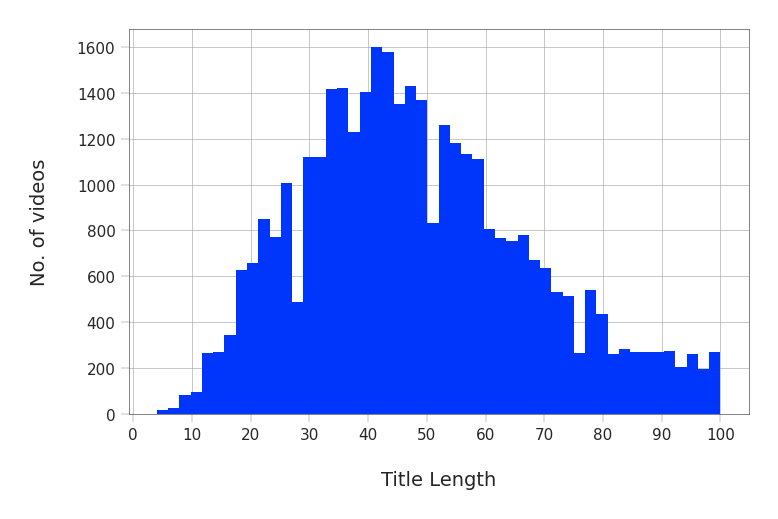

In [13]:
# Distribution of Title Length
df["title_length"] = df["title"].apply(lambda x: len(x))

# Histogram
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color = PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

average length between 35 and 55

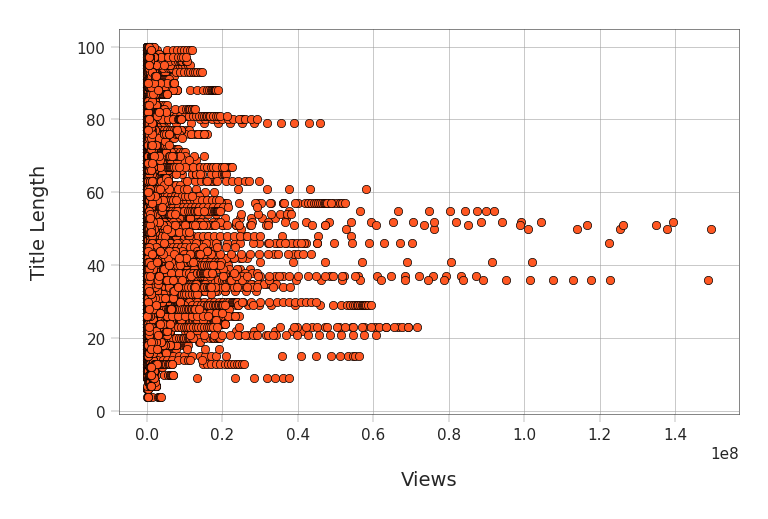

In [14]:
# Relationship between title length and views
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

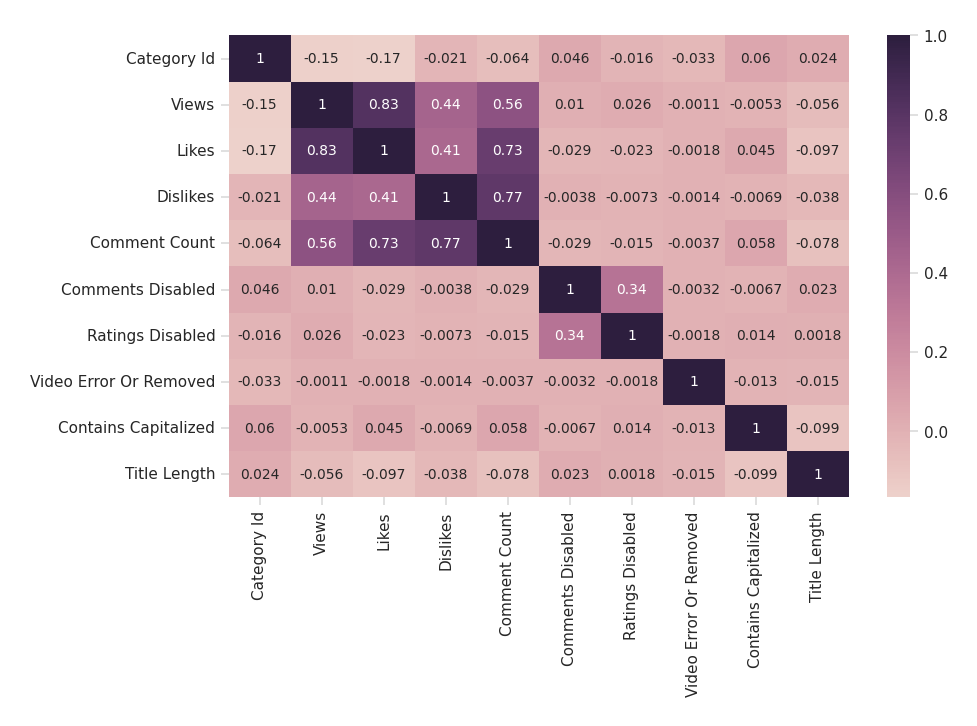

In [20]:
# Correlation
h_labels = [x.replace('_', ' ').title() for x in
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.select_dtypes(include=['number', 'bool']).corr(),
                annot=True, xticklabels=h_labels, yticklabels=h_labels,
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

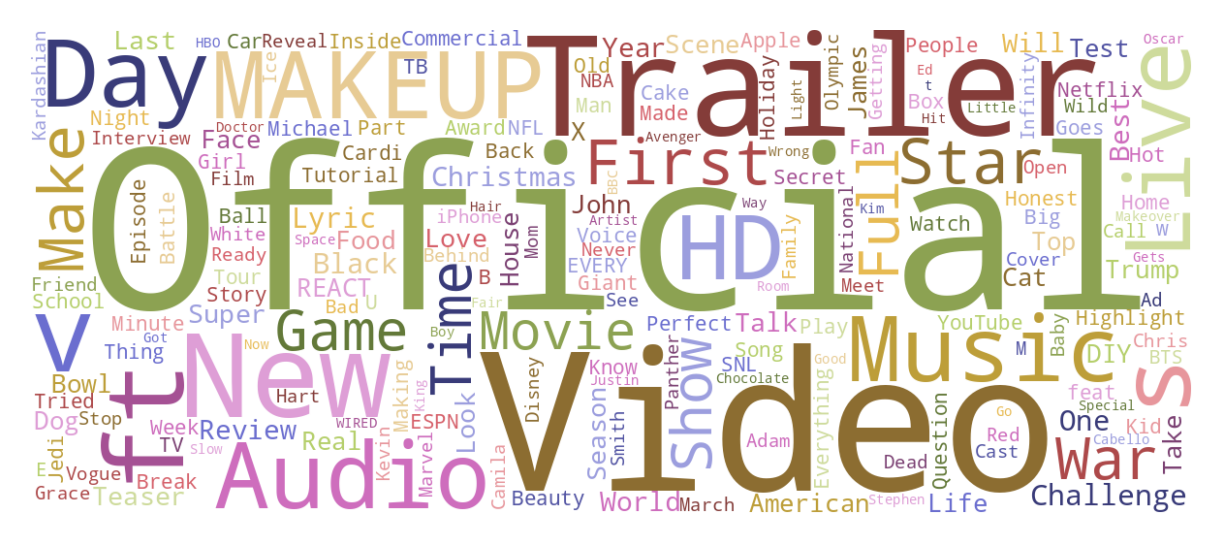

In [23]:
# Word Cloud
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")